# Manipulation des données avec Pandas

---
## Présentation

Pandas est une librairie Python spécialisée dans l’analyse des données. Nous nous intéresserons
surtout aux fonctionnalités de manipulations de données qu’elle propose. Un objet de type "data frame", qui permet de réaliser de nombreuses opérations de filtrage, prétraitements, etc., préalables à la modélisation statistique.
La [librairie est très largement documentée](https://pandas.pydata.org/).
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/1920px-Pandas_logo.svg.png" alt="Logo Librairie Panda" title="Librairie Panda" width="256">

Pour commencer, nous utiliserons la fonction de 🐼 pour lire ou écrire un fichier, dans notre cas un csv, mais 🐼 accepte d'autre format : [JSON, SQL, ...](https://pandas.pydata.org/docs/user_guide/io.html?highlight=read)

> *La fonction `.read_csv()` accepte plusieurs [arguments](https://pandas.pydata.org/docs/user_guide/io.html?highlight=read#io-read-csv-table), (qui vont permettre, avec la maitrise de cette librairie, de pouvoir commencer un pré-traitement de la donnée selon le type d'extension, les possibilitées sont tres vastes). Dans notre cas nous ne définirons le symbole de separation car par default ",".*

In [166]:
import pandas as pa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

arbres_df = pa.read_csv("./p2-arbres-fr.csv", sep=";")
#vérifions le type de df
print(type(arbres_df))

<class 'pandas.core.frame.DataFrame'>


## Structure DataFrame
Une matrice DataFrame correspond à une matrice individus-variables où les lignes correspondent à des observations, les colonnes à des attributs décrivant les individus.
Nous allons maintenant afficher différente fonction pour analyser la structure
### shape
< *`.shape` : qui retourne un tuple qui représente les dimensions de notre Dataframe.*

In [167]:
arbres_df.shape

(200137, 18)

### head
Avec [🐼.head()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html?highlight=head#pandas.DataFrame.head), nous allons pouvoir observer un rapide aperçu de notre DataFrame:`notre_variable.head()`
> *La fonction  `.tail()`  est le pendant de la fonction `.head()`  . Elle permet d'afficher les derniers éléments du DataFrame.*

Ici, nous pouvons déjà observer que certaines colonnes &| lignes possèdent des valeurs vides représentées par `NaN`.
On peut définir le nombre de lignes afficher(par défaut 5)

In [168]:
arbres_df.head(n=4)

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006


### isnull & sum
Profitons du fait de voir des `NaN` pour utiliser la combinaison de commande pratique de 🐼 `.isnull()` & `sum()`.
> [Isnull](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html?highlight=isnull#pandas.DataFrame.isnull) nous retourne un tableau de booléens de même taille que notre Dataframe Les valeurs `NaN`, telles que None ou [numpy.NaN](https://numpy.org/doc/stable/reference/constants.html?highlight=nan#numpy.NaN), sont mappées aux valeurs `True`. Tout le reste est mappé sur des valeurs ``False``.
> [Sum](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html?highlight=sum#pandas.DataFrame.sum) Renvoie la somme des valeurs sur l'axe demandé.
> > *par defaut : `DataFrame.sum(axis=None, skipna=None, level=None, numeric_only=None, min_count=0, **kwargs)`*

In [169]:
arbres_df.isnull().sum()

id                          0
type_emplacement            0
domanialite                 1
arrondissement              0
complement_addresse    169235
numero                 200137
lieu                        0
id_emplacement              0
libelle_francais         1497
genre                      16
espece                   1752
variete                163360
circonference_cm            0
hauteur_m                   0
stade_developpement     67205
remarquable             63098
geo_point_2d_a              0
geo_point_2d_b              0
dtype: int64

#### type de chaque colonne
Afin de définir nos types de variables, et nous permettre de savoir comment les traiter dans notre etude ultérieurement.

<img src="https://user.oc-static.com/upload/2017/10/30/15094028245878_Variables.jpeg" width="512">

> *Dans notre Dataframe le Type Objet est bien sûr un String 😉.*

In [170]:
print(arbres_df.dtypes)

id                       int64
type_emplacement        object
domanialite             object
arrondissement          object
complement_addresse     object
numero                 float64
lieu                    object
id_emplacement          object
libelle_francais        object
genre                   object
espece                  object
variete                 object
circonference_cm         int64
hauteur_m                int64
stade_developpement     object
remarquable            float64
geo_point_2d_a         float64
geo_point_2d_b         float64
dtype: object


### Describe

#### Génération des statistiques descriptive

Les [statistiques descriptives](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html?highlight=describe#pandas.DataFrame.describe) incluent celles qui résument la tendance centrale, la dispersion et la forme de la distribution d'un ensemble de données, à l'exclusion des `NaN` valeurs.

Analyse à la fois les séries numériques (Quantitative) et les séries d'objets (Qualitative), ainsi que les DataFrame ensembles de colonnes de types de données mixtes. La sortie varie en fonction de ce qui est fourni.
> *DataFrame.describe(percentiles=None, include=None, exclude=None, datetime_is_numeric=False)*

<p><b>count :</b> comptage du nombre de cellules de notre Dataframe</p>
<p><b>mean :</b> moyenne des valeurs :
$$
\overline{X}_n=\frac{1}{n}\sum^{n}_{i=1}X_{i}
$$
</p>
<p><b>std :</b> ecart type :
$$
\sigma \ ou \ s=\sqrt{v},\\ avec \ v=\frac{1}{n}\sum^n_{i=1}(x_i-\overline{x})^{2}
$$
</p>
<p><b>percentile :</b> centiles inclut à la sortie, celui de 50% nous indique la mediane représentée par:
$$
\ Med = x_{(\frac{n+1}{2})}
$$
</p>
<p><b>Min & Max :</b> comme leurs noms l'indique, mais permet d'avoir une première approche des valeurs aberrantes </p>

> *dans notre exemple ci-dessous des arbres de "0" de hauteur ou de circonférence, à contrario de 800k m de haut ou circonférence de 250 m ! 😅*

In [171]:
arbres_df.describe()

,id,numero,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,2.001370e+05,0.0,200137.000000,200137.000000,137039.000000,200137.000000,200137.000000
mean,3.872027e+05,NaN,83.380479,13.110509,0.001343,48.854491,2.348208
std,5.456032e+05,NaN,673.190213,1971.217387,0.036618,0.030234,0.051220
min,9.987400e+04,NaN,0.000000,0.000000,0.000000,48.742290,2.210241
25%,1.559270e+05,NaN,30.000000,5.000000,0.000000,48.835021,2.307530
50%,2.210780e+05,NaN,70.000000,8.000000,0.000000,48.854162,2.351095
75%,2.741020e+05,NaN,115.000000,12.000000,0.000000,48.876447,2.386838
max,2.024745e+06,NaN,250255.000000,881818.000000,1.000000,48.911485,2.469759


## Recherche et somme des valeurs manquante du DataFrame dans chaque colonne
> Précédemment nous avions utilisé la combinaison de fonction `.isnull().sum()`.
> Il en ressort que certaines colonnes sont quasiment vides (numeros, varieté..) et d'autres avec quelques valeurs manquantes comme "dominialité" et "genre".

commençons par "dominialité", nous affichons les valeurs qualitatives de cette colonne.
> *on remarque au passage la facilité pour cibler une colonne en particulier et l'utilisation de la fonction `.unique()` [doc.](https://pandas.pydata.org/docs/reference/api/pandas.Series.unique.html?highlight=unique#pandas.Series.unique), qui retourne un tableau numpy.*

En dernière position on retrouve notre `NaN`.

In [172]:
arbres_df.domanialite.unique()

array(['Jardin', 'Alignement', 'DJS', 'DFPE', 'CIMETIERE', 'DASCO', 'DAC',
       'PERIPHERIQUE', 'DASES', nan], dtype=object)

### Traitement
Nous allons créer une requête dans notre Data Frame pour afficher l’individu en question.
> *Pour ce faire, on utilise la fonction `.isna()` [doc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html?highlight=isna#pandas.DataFrame.isna).*

Dans le résultat ci-dessous, on peut constater que la valeur de la 'dominialite' manquante est renseigné dans le lieu, qui fait partie des valeurs possibles de la colonne.

In [173]:
arbres_df[arbres_df.domanialite.isna()]

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
197239,2020911,Arbre,NaN,PARIS 20E ARRDT,NaN,NaN,JARDINS D IMMEUBLES PORTE DE VINCENNES NORD / ...,203006,Chimonanthe,Chimonanthus,praecox,NaN,35,4,JA,0.0,48.849547,2.41419


La solution retenue et en concordance avec notre colonne est le remplacement de cette valeur manquante.
> *la fonction `.fillna()` permet de remplir les valeurs NA/NaN en utilisant la méthode spécifiée,
> pour explication des paramètres utilisés :
    <ul>
    <li><b>inplace (bool), par défaut False</li>
    Si True, remplis sur place. Remarque : cela modifiera toutes les autres vues sur cet objet (par exemple, une tranche sans copie pour une colonne dans un DataFrame).
    <li><b>limit (int), par défaut Aucun </li>
    Si la méthode est spécifiée, il s'agit du nombre maximum de valeurs NaN consécutives à remplir en avant/en arrière. Autrement dit, s'il existe un écart avec plus de ce nombre de NaN consécutifs, il ne sera que partiellement comblé. Si la méthode n'est pas spécifiée, il s'agit du nombre maximum d'entrées le long de l'axe entier où NaNs sera rempli. Doit être supérieur à 0 sinon aucun.
    </ul>*

In [174]:
arbres_df.fillna("Jardin", axis=1, inplace=True, limit=1)
arbres_df.domanialite.unique()

array(['Jardin', 'Alignement', 'DJS', 'DFPE', 'CIMETIERE', 'DASCO', 'DAC',
       'PERIPHERIQUE', 'DASES'], dtype=object)

#### Cellule manquante genre,espece

Après investigation, dans le cas de la colonne "genre", 7 des individus non renseignés, nous constatons qu’aucunes données de taille, circonférence et d’identification sont renseignées.
Pour ce faire, comme dans la recherche précédente, nous allons créer une requête.

In [175]:
arbres_df[arbres_df.genre.isna()]

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
195409,2018853,Arbre,Jardin,PARIS 13E ARRDT,NaN,NaN,PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...,104005,NaN,NaN,NaN,NaN,0,0,NaN,0.0,48.821259,2.354242
195410,2018854,Arbre,Jardin,PARIS 13E ARRDT,NaN,NaN,PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...,104006,NaN,NaN,NaN,NaN,0,0,NaN,0.0,48.821229,2.354212
195475,2018919,Arbre,Jardin,PARIS 13E ARRDT,NaN,NaN,PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...,104030,NaN,NaN,NaN,NaN,0,0,NaN,0.0,48.821281,2.353322
195476,2018920,Arbre,Jardin,PARIS 13E ARRDT,NaN,NaN,PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...,104031,NaN,NaN,NaN,NaN,0,0,NaN,0.0,48.821289,2.353228
195487,2018932,Arbre,Jardin,PARIS 13E ARRDT,NaN,NaN,PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...,105006,NaN,NaN,NaN,NaN,0,0,NaN,0.0,48.821294,2.352001
195496,2018942,Arbre,Jardin,PARIS 13E ARRDT,NaN,NaN,PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...,105017,NaN,NaN,NaN,NaN,0,0,NaN,0.0,48.821292,2.351425
195497,2018943,Arbre,Jardin,PARIS 13E ARRDT,NaN,NaN,PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...,105019,NaN,NaN,NaN,NaN,0,0,NaN,0.0,48.821260,2.351363
195499,2018945,Arbre,Jardin,PARIS 13E ARRDT,NaN,NaN,PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...,105022,NaN,NaN,NaN,NaN,0,0,NaN,0.0,48.821261,2.351296
195502,2018948,Arbre,Jardin,PARIS 13E ARRDT,NaN,NaN,PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...,105025,NaN,NaN,NaN,NaN,0,0,NaN,0.0,48.821283,2.351094
195503,2018949,Arbre,Jardin,PARIS 13E ARRDT,NaN,NaN,PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...,106001,NaN,NaN,NaN,NaN,0,0,NaN,0.0,48.821401,2.350885


Comme ces données n’ont pas d'intérêt significatif dans notre jeu (représente 0.8% des valeurs et trop de colonne vide), il est préférable de les supprimer.
Ceci étant, nous ne le feront pas sur notre csv ou notre Dataframe initial, sémantiquement déconseillé, on utilisera un ensemble de fonction 🐼 :
+ `.where()`: la fonction [where](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.where.html?highlight=where#pandas.DataFrame.where), qui comme en Sql nous permet de remplacer les valeurs où la condition est False.
+ `.copy()` : la fonction [copy](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html?highlight=copy#pandas.DataFrame.copy), qui crée avec une copie des données et des indices de l'objet appelant. Les modifications apportées aux données ou aux indices de la copie ne seront pas reflétées dans l'objet d'origine.
+ `.dropna()` : la fonction[dropna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html?highlight=dropna#pandas.DataFrame.dropna), va être utilisé pour extraire les individus aux valeurs manquantes sur la colonne “genre” grâce au sous-ensemble et stocker ces derniers dans une variable.


In [176]:
arbres_temp = arbres_df.copy()
arbres_temp[arbres_temp.lieu=="PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUPLIERS / 62 RUE DAMESME"]
arbres_genre_na = arbres_df.dropna(subset=['genre'])
arbres_genre_na.isna().sum()

id                          0
type_emplacement            0
domanialite                 0
arrondissement              0
complement_addresse    169219
numero                 200121
lieu                        0
id_emplacement              0
libelle_francais         1481
genre                       0
espece                   1736
variete                163344
circonference_cm            0
hauteur_m                   0
stade_developpement     67189
remarquable             63097
geo_point_2d_a              0
geo_point_2d_b              0
dtype: int64

> *La colonne numeros est quasi vide et pour la seule valeur presente est erroné ainsi que dans variété et stade de développement*

In [177]:
arbres_genre_na.where(arbres_df.numero.notnull()).dropna()

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874.0,Arbre,Jardin,PARIS 7E ARRDT,Jardin,Jardin,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,Jardin,20.0,5.0,Jardin,0.0,48.85762,2.320962


#### Valeur erronée
+ `.loc()` la fonction [loc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html?highlight=loc#pandas.DataFrame.loc) permet d'accéder à un groupe de lignes et de colonnes par étiquette(s) ou par tableau booléen.
+ `.difference()` la fonction [difference](https://pandas.pydata.org/docs/reference/api/pandas.Index.difference.html?highlight=difference) renvoie un nouvel index avec des éléments d'index, sans ceux passer en paramètre. Il s'agit de la différence définie entre deux objets Index.
+ `.ìnsert()` la fonction [insert](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.insert.html?highlight=insert#pandas.DataFrame.insert) permet d'insérer une colonne dans DataFrame à l'emplacement spécifié.

In [178]:
arbre_erreur_valeur = arbres_genre_na.loc[:, arbres_genre_na.columns.difference(['domanialite','complement_addresse'],sort=False)].replace(to_replace ="Jardin", value = np.nan)
arbre_erreur_valeur.insert(2,'domanialite',arbres_genre_na.domanialite)
arbre_erreur_valeur.insert(3,'complement_addresse',arbres_genre_na.complement_addresse)
arbre_erreur_valeur.isna().sum()

id                          0
type_emplacement            0
domanialite                 0
complement_addresse    169219
arrondissement              0
numero                 200122
lieu                        0
id_emplacement              0
libelle_francais         1482
genre                       1
espece                   1737
variete                163345
circonference_cm            0
hauteur_m                   0
stade_developpement     67190
remarquable             63098
geo_point_2d_a              0
geo_point_2d_b              0
dtype: int64

In [179]:
arbres_index = arbre_erreur_valeur[arbre_erreur_valeur.genre.isna()].index
arbre_erreur_valeur = arbre_erreur_valeur.drop(arbres_index).copy()

## Recherche des valeurs dupliquées du Dataframe

### Critère

Dans notre Data frame chaque arbre se trouve qu’il soit géolocalisé, ce qui rend notre recherche de duplicata fortement aisée (et le `.describe()` nous indique aucunes valeurs manquantes), car il va de soi que le croisement de coordonnées de géolocalisation oblige en l'unicité de l”entité.
La méthode sera de joindre les colonnes de localisation pour obtenir théoriquement un point coordonné et de vérifier ensuite les duplicants.
+ `.join()` fonction [join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html?highlight=join#pandas.DataFrame.join) qui une fois encore une méthode qui comme sql permet de joindre les colonnes d'un autre DataFrame sur l'index ou sur une colonne clé. Joignez efficacement plusieurs objets DataFrame par index à la fois en passant une liste.
+ `.duplicated()` fonction [duplicated](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html?highlight=duplicated#pandas.DataFrame.duplicated) qui renvoie une série booléenne indiquant les lignes en double.
+ `.drop_duplicates()` fonction [drop_duplicates](https://pandas.pydata.org/docs/reference/api/pandas.Series.drop_duplicates.html#pandas.Series.drop_duplicates) qui renvoie la série avec les valeurs en double supprimées.
Méthode pour gérer la suppression des doublons :
 + `first` : Supprime les doublons sauf pour la première occurrence.
 + `last` : supprime les doublons à l'exception de la dernière occurrence.
 + `False` : supprimez tous les doublons.

In [180]:
geo_a = pa.DataFrame(arbre_erreur_valeur.geo_point_2d_a)
geo_b = pa.DataFrame(arbre_erreur_valeur.geo_point_2d_b)
coordonnees = geo_a.join(geo_b)
coordonnees_dupliquees = coordonnees.duplicated()
coordonnees_dupliquees.sum()

11

> *affichons nos valeurs dupliquées pour controler la veracité*

In [181]:
arbre_erreur_valeur[coordonnees_dupliquees]

,id,type_emplacement,domanialite,complement_addresse,arrondissement,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
10100,112287,Arbre,Jardin,NaN,PARIS 12E ARRDT,NaN,JARDIN PARTAGE BEL-AIR,6,Ailante,Ailanthus,altissima,NaN,0,0,NaN,NaN,48.838318,2.406610
76385,195525,Arbre,PERIPHERIQUE,NaN,PARIS 19E ARRDT,NaN,VOIE DF/19,09VO19001,Peuplier,Populus,nigra,Italica',120,20,NaN,NaN,48.900332,2.386441
76386,195526,Arbre,PERIPHERIQUE,NaN,PARIS 19E ARRDT,NaN,VOIE DF/19,09VO19002,Peuplier,Populus,nigra,Italica',100,20,NaN,NaN,48.900290,2.386442
76387,195527,Arbre,PERIPHERIQUE,NaN,PARIS 19E ARRDT,NaN,VOIE DF/19,09VO19003,Peuplier,Populus,nigra,Italica',165,20,NaN,NaN,48.900253,2.386444
185480,2006188,Arbre,Alignement,NaN,BOIS DE VINCENNES,NaN,ROUTE DAUPHINE,402030,Tilleul,Tilia,platyphyllos,NaN,0,0,NaN,0.0,48.829912,2.439665
188304,2010609,Arbre,Jardin,NaN,BOIS DE VINCENNES,NaN,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,20023,Platane,Platanus,x hispanica,NaN,190,24,A,0.0,48.839118,2.438810
189134,2011523,Arbre,Jardin,NaN,BOIS DE VINCENNES,NaN,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,190042,Peuplier,Populus,nigra,Italica',100,22,A,0.0,48.836416,2.446277
193017,2015806,Arbre,Jardin,NaN,BOIS DE VINCENNES,NaN,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,3120005,Pin,Pinus,nigra,NaN,0,0,NaN,0.0,48.839561,2.446210
193577,2016369,Arbre,Jardin,NaN,BOIS DE VINCENNES,NaN,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,210035,Pommier à fleurs,Malus,trilobata,NaN,0,0,NaN,0.0,48.836862,2.446518
193586,2016378,Arbre,Jardin,NaN,BOIS DE VINCENNES,NaN,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,20128,Cèdre,Cedrus,libani subsp. atlantica,NaN,0,0,NaN,0.0,48.838550,2.439268


> *procédons au nettoyage de notre dataframe*

In [182]:
arbres_clean = arbre_erreur_valeur.drop_duplicates(subset=['geo_point_2d_a','geo_point_2d_b'],keep='last').copy()
arbres_clean.describe()

,id,numero,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,2.001100e+05,0.0,200110.000000,200110.000000,137016.000000,200110.000000,200110.000000
mean,3.870209e+05,NaN,83.387107,13.111659,0.001343,48.854493,2.348203
std,5.453590e+05,NaN,673.235009,1971.350362,0.036621,0.030234,0.051220
min,9.987400e+04,NaN,0.000000,0.000000,0.000000,48.742290,2.210241
25%,1.559242e+05,NaN,30.000000,5.000000,0.000000,48.835024,2.307525
50%,2.210685e+05,NaN,70.000000,8.000000,0.000000,48.854166,2.351087
75%,2.740848e+05,NaN,115.000000,12.000000,0.000000,48.876450,2.386833
max,2.024745e+06,NaN,250255.000000,881818.000000,1.000000,48.911485,2.469759


In [183]:
arbres_clean.columns

Index(['id', 'type_emplacement', 'domanialite', 'complement_addresse',
       'arrondissement', 'numero', 'lieu', 'id_emplacement',
       'libelle_francais', 'genre', 'espece', 'variete', 'circonference_cm',
       'hauteur_m', 'stade_developpement', 'remarquable', 'geo_point_2d_a',
       'geo_point_2d_b'],
      dtype='object')

In [184]:
arbres_clean.count()

id                     200110
type_emplacement       200110
domanialite            200110
complement_addresse     30903
arrondissement         200110
numero                      0
lieu                   200110
id_emplacement         200110
libelle_francais       198629
genre                  200110
espece                 198374
variete                 36776
circonference_cm       200110
hauteur_m              200110
stade_developpement    132928
remarquable            137016
geo_point_2d_a         200110
geo_point_2d_b         200110
dtype: int64

In [185]:
def describe_columns(key_name):
    column_name_counts = arbres_clean[key_name].value_counts()
    for key,value in column_name_counts.iteritems():
        subset = arbres_clean[arbres_clean[key_name] == key].drop(['id'],axis=1)
        print("-"*20)
        print(f"{column_name_counts.name} : {key}")
        print(subset.describe())

In [186]:
def count_by_columns():
    for key,value in arbres_clean.iteritems():
        print("*"*20)
        print(value.describe())
        print(f"liste de valeur(s) unique : {value.sort_values().unique()}")

In [187]:
count_by_columns()

********************
count    2.001100e+05
mean     3.870209e+05
std      5.453590e+05
min      9.987400e+04
25%      1.559242e+05
50%      2.210685e+05
75%      2.740848e+05
max      2.024745e+06
Name: id, dtype: float64
liste de valeur(s) unique : [  99874   99875   99876 ... 2024743 2024744 2024745]
********************
count     200110
unique         1
top        Arbre
freq      200110
Name: type_emplacement, dtype: object
liste de valeur(s) unique : ['Arbre']
********************
count         200110
unique             9
top       Alignement
freq          104948
Name: domanialite, dtype: object
liste de valeur(s) unique : ['Alignement' 'CIMETIERE' 'DAC' 'DASCO' 'DASES' 'DFPE' 'DJS' 'Jardin'
 'PERIPHERIQUE']
********************
count     30903
unique     3796
top         SN°
freq        557
Name: complement_addresse, dtype: object
liste de valeur(s) unique : ['0' '03-01' '03-04' ... 'école militaire' 'îlot unesco' nan]
********************
count              200110
unique         

In [188]:
arbres_quantitative = arbres_clean.drop([
    "id",
    "complement_addresse",
    "numero",
    "circonference_cm",
    "hauteur_m",
    "geo_point_2d_a",
    "geo_point_2d_b"
],axis=1)
for key,value in arbres_quantitative.iteritems():
    describe_columns(key) if (key == 'stade_developpement') else ''

--------------------
stade_developpement : A
       numero  circonference_cm     hauteur_m   remarquable  geo_point_2d_a  \
count     0.0      64435.000000  64435.000000  59943.000000    64435.000000   
mean      NaN        132.761325     13.330116      0.000901       48.857051   
std       NaN       1179.942345     22.256600      0.030001        0.024753   
min       NaN          0.000000      0.000000      0.000000       48.742371   
25%       NaN         90.000000     10.000000      0.000000       48.840102   
50%       NaN        115.000000     12.000000      0.000000       48.857773   
75%       NaN        150.000000     15.000000      0.000000       48.873827   
max       NaN     250255.000000   2525.000000      1.000000       48.911050   

       geo_point_2d_b  
count    64435.000000  
mean         2.344227  
std          0.049449  
min          2.211330  
25%          2.304550  
50%          2.345071  
75%          2.383139  
max          2.469752  
--------------------
stade_

# recherche des valeur aberente

In [189]:
arbres_clean.describe()

,id,numero,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,2.001100e+05,0.0,200110.000000,200110.000000,137016.000000,200110.000000,200110.000000
mean,3.870209e+05,NaN,83.387107,13.111659,0.001343,48.854493,2.348203
std,5.453590e+05,NaN,673.235009,1971.350362,0.036621,0.030234,0.051220
min,9.987400e+04,NaN,0.000000,0.000000,0.000000,48.742290,2.210241
25%,1.559242e+05,NaN,30.000000,5.000000,0.000000,48.835024,2.307525
50%,2.210685e+05,NaN,70.000000,8.000000,0.000000,48.854166,2.351087
75%,2.740848e+05,NaN,115.000000,12.000000,0.000000,48.876450,2.386833
max,2.024745e+06,NaN,250255.000000,881818.000000,1.000000,48.911485,2.469759


pour un visuel plus agreable nous utiliserons les valeur min, quartiles et max sur nos ordonnees

In [190]:
def value_groub_by(data_frame,column_name):
    taille_classe = 9 # taille des classes pour la discrétisation

    groupes = [] # va recevoir les données agrégées à afficher

    # on calcule des tranches allant de 0 au solde maximum par paliers de taille taille_classe
    tranches = np.arange(0, max(data_frame[column_name.name]), taille_classe)
    # print(tranches)
    tranches += int(taille_classe/2)# on décale les tranches d'une demi taille de classe
    # print(tranches)
    indices = np.digitize(data_frame[column_name.name], tranches) # associe chaque valeur à son numéro de classe
    # print(indices)
    for ind, tr in enumerate(tranches): # pour chaque tranche, ind reçoit le numéro de tranche et tr la tranche en question
        valeurs = data_frame.loc[indices==ind,column_name.name] # sélection des individus de la tranche ind
        if len(valeurs) > 0:
            g = {
                'valeurs': valeurs,
                'centre_classe': tr-(taille_classe/2),
                'taille': len(valeurs),
                'quartiles': [np.percentile(valeurs,p) for p in [25,50,75]]
            }
            groupes.append(g)
    return groupes

In [191]:
x=arbres_clean.describe()
x_value = x.circonference_cm[['min','25%','50%','75%','max']]
x_value

min         0.0
25%        30.0
50%        70.0
75%       115.0
max    250255.0
Name: circonference_cm, dtype: float64

## circonference

### Analyse descriptive de la variable CIRCONFERENCE (cm)
#### Distribution de CIRCONFERENCE (cm)
+ recherche de valeur(s) aberrante(s)
> *grace au catplot et une echelle logarithmique on affichera les valeurs outlets*

2439.0


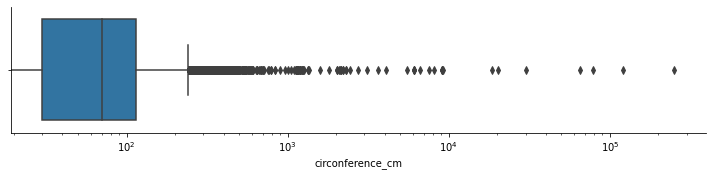

In [192]:
remarquable = arbres_clean.where(arbres_clean.remarquable == 1.0).dropna(subset=['remarquable'])
remarquable_cir_max = remarquable['circonference_cm'].max()
print(remarquable_cir_max)
graph = sns.catplot(data=arbres_clean, x='circonference_cm', hue ="circonference_cm", kind="box", height=2.5, aspect=4)
graph.set(xscale="log")

+ pour clarifier notre analyse descriptive nous limiterons nos valeurs en excluant les valeurs nulles et évidemment la circonférence maximum doit être celle d'un arbre remarquable, le record est detenu par [platane d'Orient](https://www.unjourdeplusaparis.com/fr/paris-vert/arbres-remarquables-paris#:~:text=Le%20plus%20gros%20%3A%20platane%20d'Orient%20du%20Parc%20Monceau&text=Plant%C3%A9%20en%201814%2C%20son%20tronc,%C3%A9cus%2C%20plant%C3%A9%20en%201879) (de 7,05 m de circonférence au parc Monceau, Paris).

In [193]:
arbres_clean_circonference = arbres_clean.where(arbres_clean.circonference_cm <= 705)
arbres_clean_circonference = arbres_clean_circonference.where(arbres_clean.circonference_cm > 0)
arbres_clean_circonference.describe()

,id,numero,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,1.741810e+05,0.0,174181.000000,174181.000000,130779.000000,174181.000000,174181.000000
mean,3.694789e+05,NaN,91.444061,15.036531,0.001399,48.856313,2.345658
std,5.118466e+05,NaN,58.854040,2112.984897,0.037381,0.025845,0.049596
min,9.987400e+04,NaN,1.000000,0.000000,0.000000,48.742290,2.210241
25%,1.645660e+05,NaN,45.000000,5.000000,0.000000,48.836718,2.306553
50%,2.281060e+05,NaN,80.000000,10.000000,0.000000,48.855958,2.348864
75%,2.752790e+05,NaN,122.000000,13.000000,0.000000,48.875522,2.383698
max,2.023468e+06,NaN,700.000000,881818.000000,1.000000,48.911485,2.469759


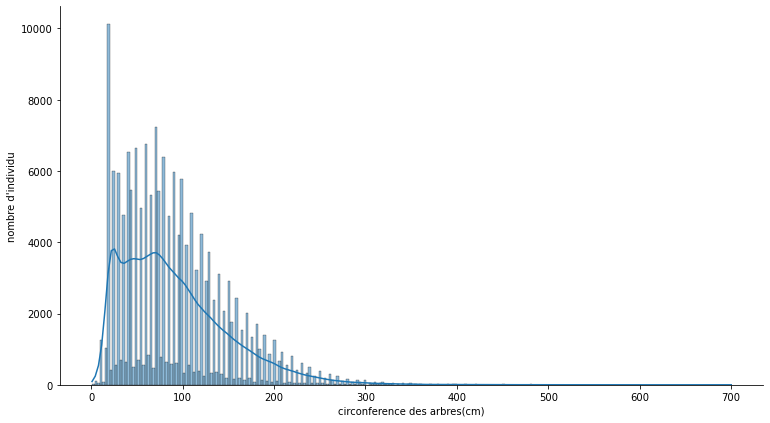

In [194]:
histogramme = sns.displot(data=arbres_clean_circonference, x="circonference_cm", kde=True, height=6, aspect=1.8)
histogramme.set(xlabel="circonference des arbres(cm)", ylabel="nombre d'individu")
plt.show()


## interpretation
> Notre courbe se rapproche d'une distribution uni-modale avec un pic significatif vers les 20 cm, ce qui peut laisser supposer (confirmé sur l'étude plus bas) d'une importante plantation de d'arbres sur une période récente.

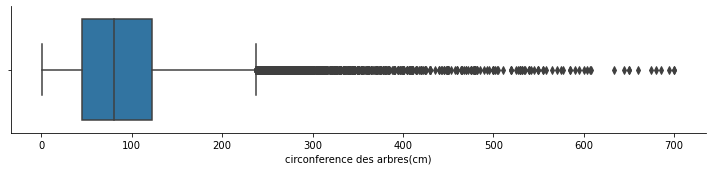

In [195]:
catplot = sns.catplot(data=arbres_clean_circonference, x='circonference_cm', hue ="circonference_cm", kind="box", height=2.5, aspect=4 )
catplot.set(xlabel="circonference des arbres(cm)")

## hauteur

### Analyse descriptive de la variable HAUTEUR (m)
#### Distribution de HAUTEUR (m)
+ recherche de valeur(s) aberrante(s)
> *grace au catplot et une echelle logarithmique on affichera les valeurs outlets*

327.0


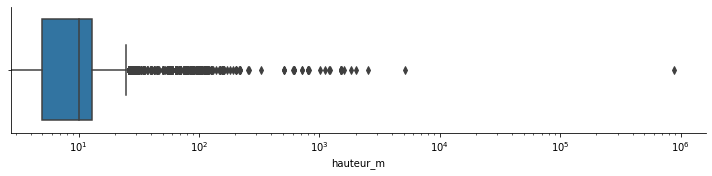

In [196]:
remarquable = arbres_clean_circonference.where(arbres_clean_circonference.remarquable == 1.0).dropna(subset=['remarquable'])
remarquable_ht_max = remarquable['hauteur_m'].max()
print(remarquable_ht_max)
graph = sns.catplot(data=arbres_clean_circonference, x='hauteur_m', hue ="hauteur_m", kind="box", height=2.5, aspect=4)
graph.set(xscale="log")

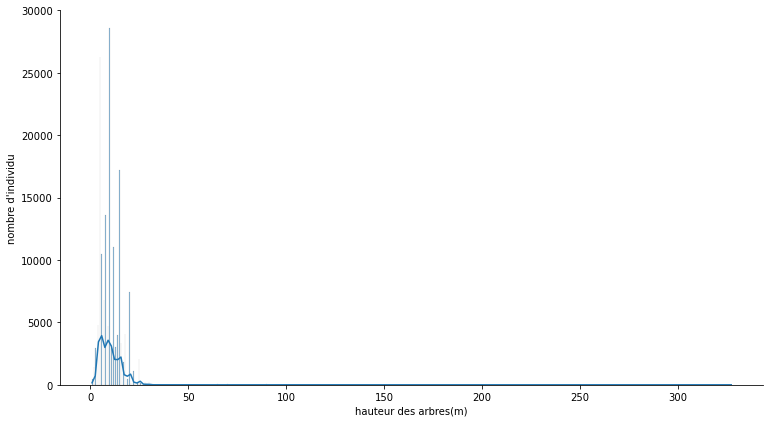

In [197]:
arbres_clean_hauteur = arbres_clean_circonference.where(arbres_clean_circonference.hauteur_m <= remarquable_ht_max )
arbres_clean_hauteur = arbres_clean_hauteur.where(arbres_clean_hauteur.hauteur_m > 0)
histogramme = sns.displot(data=arbres_clean_hauteur, x="hauteur_m", kde=True, height=6, aspect=1.8)
histogramme.set(xlabel="hauteur des arbres(m)", ylabel="nombre d'individu")
plt.show()

+ pour clarifier notre analyse descriptive nous limiterons nos valeurs en excluant les valeurs nulles et malgré la recherche de la hauteur maximum dans les arbres remarquables celle-ci reste aberrante.
+ nous pourrions comptabiliser les valeurs au-delà de 50 m d'après l'histogramme.

In [198]:
arbres_clean_hauteur.hauteur_m.where(arbres_clean_hauteur.hauteur_m > 50).count()

410

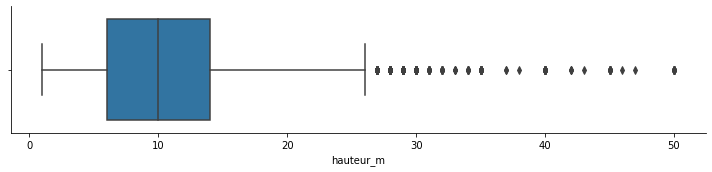

In [199]:
arbres_clean_quantitative = arbres_clean_hauteur.where(arbres_clean_hauteur.hauteur_m <= 50)
sns.catplot(data=arbres_clean_quantitative, x='hauteur_m', hue ="hauteur_m", kind="box", height=2.5, aspect=4)

In [200]:
arbres_clean_quantitative = arbres_clean_quantitative.where(arbres_clean_quantitative.hauteur_m > 0)
arbres_clean_quantitative.describe()

,id,numero,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,1.600210e+05,0.0,160021.000000,160021.000000,127481.000000,160021.000000,160021.000000
mean,3.803044e+05,NaN,92.449603,10.374770,0.001428,48.855827,2.346138
std,5.184167e+05,NaN,58.871372,5.172135,0.037758,0.025860,0.049322
min,9.987400e+04,NaN,1.000000,1.000000,0.000000,48.742290,2.210416
25%,1.872820e+05,NaN,50.000000,6.000000,0.000000,48.836802,2.307585
50%,2.331220e+05,NaN,80.000000,10.000000,0.000000,48.855185,2.348741
75%,2.770050e+05,NaN,125.000000,14.000000,0.000000,48.874124,2.383173
max,2.023468e+06,NaN,700.000000,50.000000,1.000000,48.911485,2.469759


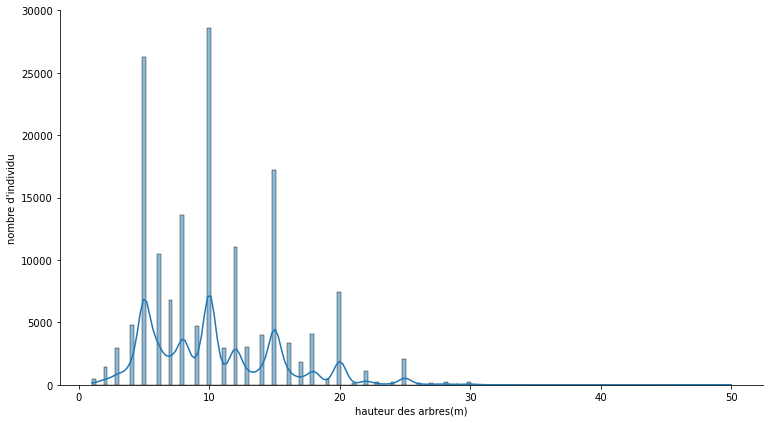

In [201]:
histogramme = sns.displot(data=arbres_clean_quantitative, x="hauteur_m", kde=True, height=6, aspect=1.8)
histogramme.set(xlabel="hauteur des arbres(m)", ylabel="nombre d'individu")
plt.show()

##### interpretaion

> Nous sommes clairement dans une courbe pluri-modale, avec plusieurs pics de hauteur, ce qui peut paraitre logique, car chaque genre d'arbres possèdent des tailles adultes différentes, avec des taux de croissance propre. Nous pourrions etudier cette affirmation avec un graphique quantitative/qualitative sur quelques espèces et verifier par la présence de courbe uni_modale.

## Stade de developpement
### Analyse descriptive de la variable STADE DE DEVELOPPEMENT
Répartition de STADE DE DEVELOPPEMENT par classe

In [202]:
arbres_clean_qualitative = arbres_clean_quantitative.drop([
    "id",

    "complement_addresse",
    "numero",
    "circonference_cm",
    "hauteur_m",
    "geo_point_2d_a",
    "geo_point_2d_b"
],axis=1)
# arbres_clean_qualitative.value_counts(sort=False)
arbres_clean_qualitative.genre.value_counts(sort=False)

Aesculus        22903
Taxus            1345
Acer            12510
Platanus        39267
Sophora         10448
                ...  
Sassafras           4
Idesia              1
Poliothyrsis        1
Kalopanax           1
Alangium            1
Name: genre, Length: 146, dtype: int64

In [203]:
labels=arbres_clean_qualitative.genre
somme_genre = arbres_clean_qualitative.genre.value_counts()
somme_genre_norm = arbres_clean_qualitative.genre.value_counts(normalize=True)
distribution = dict()
total = somme_genre.sum()
frequences_list = []
values_list =[]
names_list = []
for key, value in somme_genre.items():
  frequence = value/total
  distribution[f"{key}"] = [value, frequence]
distribution

for key, value in somme_genre.items():
   frequences_list.append(value/total)
   values_list.append(value)
   names_list.append(key)
frequences_list
values_list
names_list
somme_genre.describe()

count      146.000000
mean      1096.034247
std       4228.420609
min          1.000000
25%          5.000000
50%         41.000000
75%        470.500000
max      39267.000000
Name: genre, dtype: float64

In [204]:
arbres_vc = arbres_clean_qualitative.genre.value_counts()
arbres_vc = arbres_vc.head(40)
arbres_clean_qualitative_echantillon = arbres_clean_qualitative.loc[arbres_clean_qualitative.genre.isin(arbres_vc.index)]
arbres_clean_qualitative_echantillon.genre.value_counts().index
arbres_vc.index

Index(['Platanus', 'Aesculus', 'Tilia', 'Acer', 'Sophora', 'Prunus',
       'Fraxinus', 'Celtis', 'Pyrus', 'Populus', 'Corylus', 'Quercus', 'Pinus',
       'Carpinus', 'Robinia', 'Ulmus', 'Malus', 'Taxus', 'Betula', 'Paulownia',
       'Chamaecyparis', 'Gleditsia', 'Toona', 'Fagus', 'Ginkgo', 'Cercis',
       'Juglans', 'Ailanthus', 'Pterocarya', 'Magnolia', 'Cedrus',
       'Liriodendron', 'Morus', 'Koelreuteria', 'Liquidambar', 'Ostrya',
       'Cupressus', 'x Cupressocyparis', 'Ligustrum', 'Catalpa'],
      dtype='object')

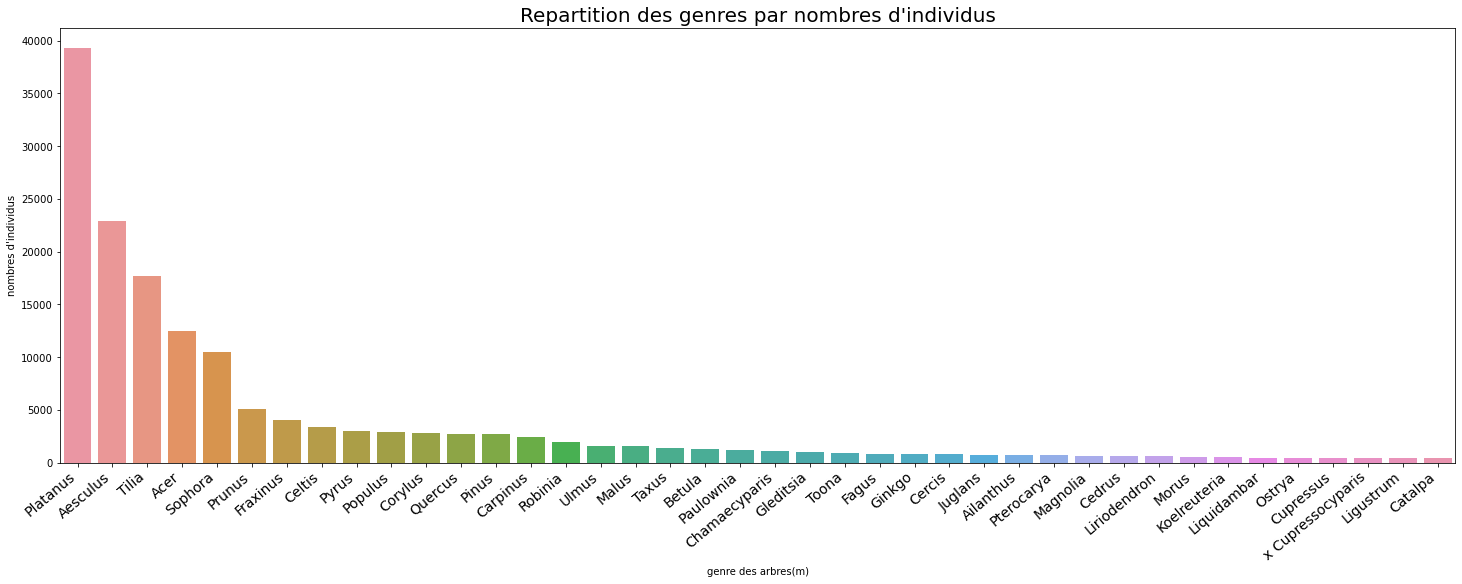

<Figure size 1800x576 with 0 Axes>

In [205]:
histogramme = sns.countplot(data=arbres_clean_qualitative_echantillon, x="genre", order=arbres_vc.index)
histogramme.set(xlabel="genre des arbres(m)", ylabel="nombres d'individus")
histogramme.set_xticklabels(histogramme.get_xticklabels(), rotation=40, ha="right", fontdict={'fontsize': 14})
plt.title(f"Repartition des {arbres_clean_qualitative_echantillon.genre.name}s par nombres d'individus", fontdict={'fontsize': 20})
plt.figure(figsize=(25, 8))
plt.tight_layout()
plt.show()

In [214]:
arbres_clean_qualitative.stade_developpement.describe()

count     130100
unique         4
top            A
freq       63058
Name: stade_developpement, dtype: object

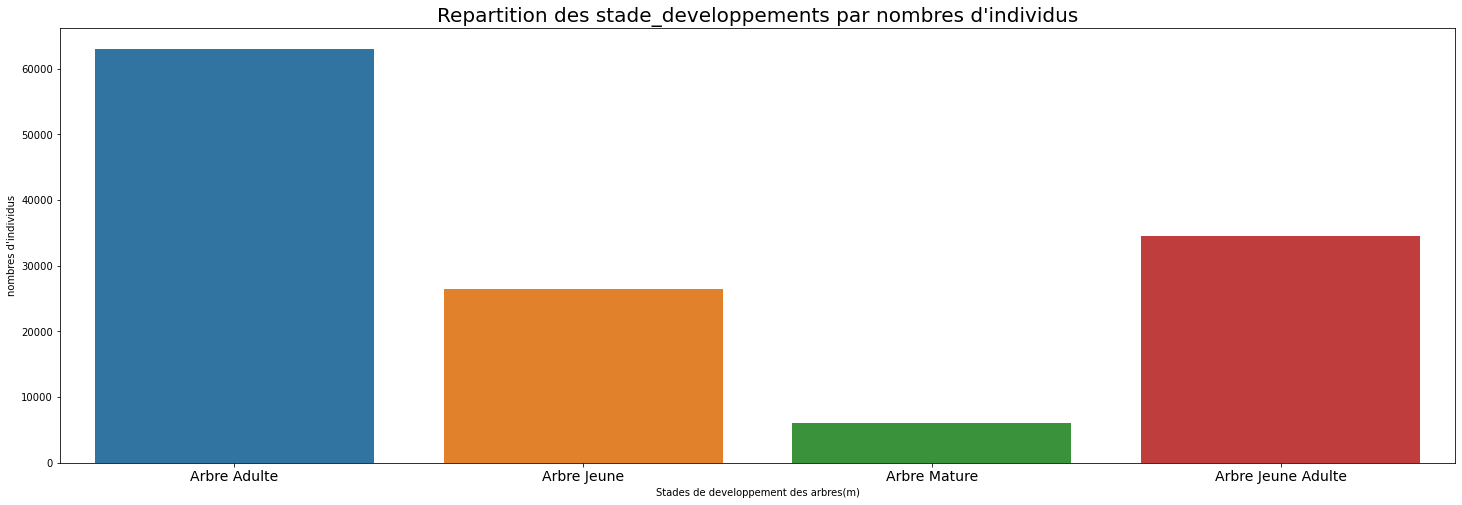

<Figure size 1800x576 with 0 Axes>

In [209]:
histogramme = sns.countplot(data=arbres_clean_qualitative, x="stade_developpement")
histogramme.set(xlabel="Stades de developpement des arbres(m)", ylabel="nombres d'individus")
histogramme.set_xticklabels(['Arbre Adulte','Arbre Jeune','Arbre Mature','Arbre Jeune Adulte'], fontdict={'fontsize': 14})
plt.title(f"Repartition des {arbres_clean_qualitative_echantillon.stade_developpement.name}s par nombres d'individus", fontdict={'fontsize': 20})
plt.figure(figsize=(25, 8))
plt.tight_layout()
plt.show()

## Analyse univariée de la distribution de HAUTEUR (m) en fonction de CIRCONFERENCE (cm)

### Variable quantitative : indicateurs numériques
$$
\varsigma_{X,Y}=\frac{1}{n}\sum^{n}_{i=1}(x_i−x̅)(y_i−y̅)
$$
#### La covariance empirique et le coefficient de corrélation
$$
\varsigma^{2}_{X}=\frac{1}{n}\sum^{n}_{i=1}(x-x̅)^{2}
$$
>	Soit pour ramener la covariance empirique à une valeur qui soit comprise entre -1 et 1:

$$
r_{X,Y}=\frac{\varsigma_{X,Y}}{\varsigma_X\varsigma_Y}
$$

In [ ]:
import scipy.stats as st
import numpy as np
arbres_cf = arbres_clean_quantitative.circonference_cm.dropna()
arbres_ht =arbres_clean_quantitative.hauteur_m.dropna()
# print(st.pearsonr(arbres_cf, arbres_ht)[0])
# print(np.cov(arbres_clean_quantitative.circonference_cm,-arbres_clean_quantitative.hauteur_m,ddof=0))
def coef_cor_2_Pearson(a, b):
    v = st.pearsonr(a,b)[0]
    return v
coef_cor_2_Pearson(arbres_cf,arbres_ht)

L'estimation statistique chez Seaborn va au-delà des statistiques descriptives. Par exemple, il est possible d'améliorer un nuage de points en incluant un modèle de régression linéaire (et son incertitude) en utilisant lmplot():

In [ ]:
lmplot = sns.lmplot(data=arbres_clean_quantitative, x="circonference_cm", y="hauteur_m",hue="stade_developpement", palette="Set1",  height=6, aspect=1.8)
lmplot.set(xlabel="circonference des arbres(cm)", ylabel="hauteur des arbres(m)",)

#### Interprétation
Le coefficient de corrélation de Spearman est la mesure de la corrélation monotone entre deux variables. C'est un nombre compris entre -1 et 1; 0 représenterais une absence de corrélation.

Il existe une corrélation statistiquement significative entre CIRCONFERENCE (cm) et HAUTEUR (m).

In [ ]:
sns.lmplot(data=arbres_clean_quantitative, x="circonference_cm", y="hauteur_m", col="stade_developpement", hue="remarquable")